## Weather Prediction

-----------
Physical units of the variables:
----------

### ORIGINAL DATA UNITS:<br>
CC   : cloud cover in oktas<br>
DD   : wind direction in degrees<br>
FG   : wind speed in 0.1 m/s<br>
FX   : wind gust in 0.1 m/s<br>
HU   : humidity in 1 %<br>
PP   : sea level pressure in 0.1 hPa<br>
QQ   : global radiation in W/m2<br>
RR   : precipitation amount in 0.1 mm<br>
SS   : sunshine in 0.1 Hours<br>
TG   : mean temperature in 0.1 &#176;C<br>
TN   : minimum temperature in 0.1 &#176;C<br>
TX   : maximum temperature in 0.1 &#176;C<br>


### CONVERTED to:<br>
CC   : cloud cover in oktas<br>
DD   : wind direction in degrees<br>
FG   : wind speed in 1 m/s<br>
FX   : wind gust in 1 m/s<br>
HU   : humidity in fraction of 100 %<br>
PP   : sea level pressure in 1000 hPa<br>
QQ   : global radiation in 100 W/m2<br>
RR   : precipitation amount in 10 mm<br>
SS   : sunshine in 1 Hours<br>
TG   : mean temperature in 1 &#176;C<br>
TN   : minimum temperature in 1 &#176;C<br>
TX   : maximum temperature in 1 &#176;C<br>

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [24]:
df = pd.read_csv('csv/weather_prediction_dataset.csv')
label = pd.read_csv('csv/weather_prediction_bbq_labels.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB


In [26]:
df.head(12)

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
5,20000106,1,3,0.85,1.0244,0.56,0.00,5.7,4.2,1.9,...,-0.6,4.0,3.4,0.92,1.0209,0.55,0.20,7.1,3.5,10.7
6,20000107,1,8,0.84,1.0267,0.20,0.00,0.0,4.7,1.8,...,1.7,4.1,2.8,0.96,1.0258,0.27,0.00,6.0,3.3,8.8
7,20000108,1,4,0.79,1.0248,0.54,0.00,4.3,5.6,4.1,...,3.5,6.4,3.6,0.97,1.0210,0.18,0.14,8.2,5.3,11.0
8,20000109,1,8,0.88,1.0243,0.11,0.65,0.0,4.6,3.8,...,3.3,5.1,3.0,0.91,1.0280,0.43,0.02,5.6,3.7,7.6
9,20000110,1,8,0.91,1.0337,0.06,0.09,0.0,2.4,1.4,...,0.0,5.5,1.9,0.94,1.0369,0.58,0.04,1.8,-1.5,5.0


In [27]:
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   DATE                    3654 non-null   int64
 1   BASEL_BBQ_weather       3654 non-null   bool 
 2   BUDAPEST_BBQ_weather    3654 non-null   bool 
 3   DE_BBQ_weather          3654 non-null   bool 
 4   DRESDEN_BBQ_weather     3654 non-null   bool 
 5   DUSSELDORF_BBQ_weather  3654 non-null   bool 
 6   HEATHROW_BBQ_weather    3654 non-null   bool 
 7   KASSEL_BBQ_weather      3654 non-null   bool 
 8   LJUBLJANA_BBQ_weather   3654 non-null   bool 
 9   MAASTRICHT_BBQ_weather  3654 non-null   bool 
 10  MALMO_BBQ_weather       3654 non-null   bool 
 11  MONTELIMAR_BBQ_weather  3654 non-null   bool 
 12  MUENCHEN_BBQ_weather    3654 non-null   bool 
 13  OSLO_BBQ_weather        3654 non-null   bool 
 14  PERPIGNAN_BBQ_weather   3654 non-null   bool 
 15  SONNBLICK_BBQ_weather

In [28]:
label.head(12)

,DATE,BASEL_BBQ_weather,BUDAPEST_BBQ_weather,DE_BBQ_weather,DRESDEN_BBQ_weather,DUSSELDORF_BBQ_weather,HEATHROW_BBQ_weather,KASSEL_BBQ_weather,LJUBLJANA_BBQ_weather,MAASTRICHT_BBQ_weather,MALMO_BBQ_weather,MONTELIMAR_BBQ_weather,MUENCHEN_BBQ_weather,OSLO_BBQ_weather,PERPIGNAN_BBQ_weather,SONNBLICK_BBQ_weather,STOCKHOLM_BBQ_weather,TOURS_BBQ_weather
0,20000101,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,20000102,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,20000103,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,20000104,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,20000105,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,20000106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,20000107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,20000108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,20000109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,20000110,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB


### Budapest (Hungary capital)

In [30]:
df_budapest = pd.concat([df.iloc[:,:2],df.iloc[:,11:19]],axis=1)
df_budapest['DATE'] = pd.to_datetime(df_budapest['DATE'],format='%Y%m%d')

In [31]:
def mean_for_mth(feature):
    mean = []
    for x in range(12):
        mean.append(
            float("{:.2f}".format(df_budapest[df_budapest['MONTH'] == (x+1)][feature].mean())))
    return mean

In [32]:
df_budapest.drop(['MONTH'],axis=1).describe()

,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_max
count,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,4.890531,0.656505,1.016935,1.465487,0.136442,5.753229,12.174849,16.629091
std,2.386442,0.149603,0.007795,0.977986,0.408932,4.475439,8.744451,9.981538
min,0.000000,0.260000,0.989100,0.040000,0.000000,0.000000,-9.800000,-6.600000
25%,3.000000,0.540000,1.012100,0.580000,0.000000,1.100000,5.100000,8.400000
50%,5.000000,0.650000,1.016500,1.340000,0.000000,5.900000,12.800000,17.400000
75%,7.000000,0.770000,1.021475,2.310000,0.030000,9.600000,19.300000,25.000000
max,8.000000,1.000000,1.043800,3.490000,6.960000,14.900000,33.100000,40.100000


Text(0, 0.5, 'DEGREE')

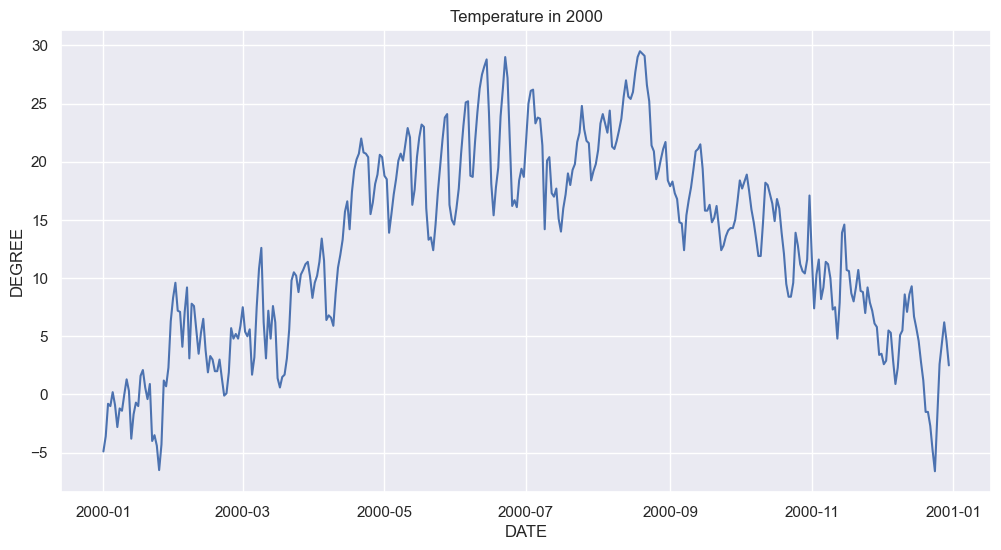

In [33]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
plt.plot(df_budapest['DATE'][:365],df_budapest['BUDAPEST_temp_mean'][:365])
plt.title('Temperature in 2000')
plt.xlabel('DATE')
plt.ylabel('DEGREE')

[Text(0, 0, '0.85'),
 Text(0, 0, '2.78'),
 Text(0, 0, '6.91'),
 Text(0, 0, '13.13'),
 Text(0, 0, '18.03'),
 Text(0, 0, '20.97'),
 Text(0, 0, '22.67'),
 Text(0, 0, '22.37'),
 Text(0, 0, '16.98'),
 Text(0, 0, '12.42'),
 Text(0, 0, '6.94'),
 Text(0, 0, '1.57')]

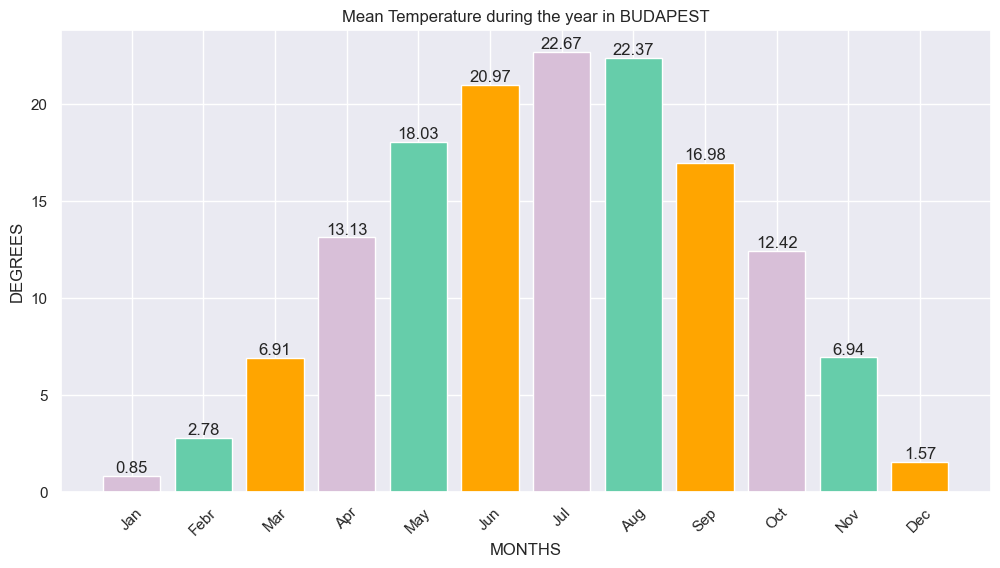

In [34]:
months = ['Jan', 'Febr', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
          'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
mean_temp = mean_for_mth('BUDAPEST_temp_mean')
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
bar = plt.bar(x = months,height = mean_temp, width = 0.8, color=['thistle','mediumaquamarine',                'orange'])
plt.xticks(rotation = 45)
plt.xlabel('MONTHS')
plt.ylabel('DEGREES')
plt.title('Mean Temperature during the year in BUDAPEST')
plt.bar_label(bar)


[Text(0, 0, '0.77'),
 Text(0, 0, '0.71'),
 Text(0, 0, '0.64'),
 Text(0, 0, '0.55'),
 Text(0, 0, '0.56'),
 Text(0, 0, '0.57'),
 Text(0, 0, '0.58'),
 Text(0, 0, '0.59'),
 Text(0, 0, '0.64'),
 Text(0, 0, '0.72'),
 Text(0, 0, '0.77'),
 Text(0, 0, '0.79')]

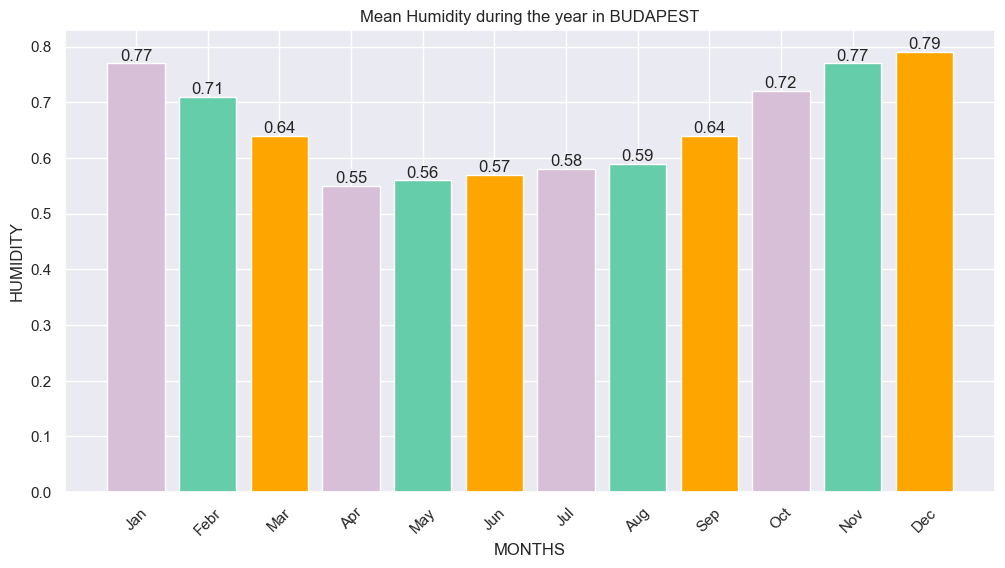

In [35]:
sns.set(style="darkgrid")
mean_temp = mean_for_mth('BUDAPEST_humidity')
plt.figure(figsize=(12,6))
bar = plt.bar(x = months, height = mean_temp, width = 0.8, color=['thistle','mediumaquamarine',                'orange'])
plt.xticks(rotation = 45)
plt.xlabel('MONTHS')
plt.ylabel('HUMIDITY')
plt.title('Mean Humidity during the year in BUDAPEST')
plt.bar_label(bar)

<Axes: xlabel='BUDAPEST_global_radiation', ylabel='Count'>

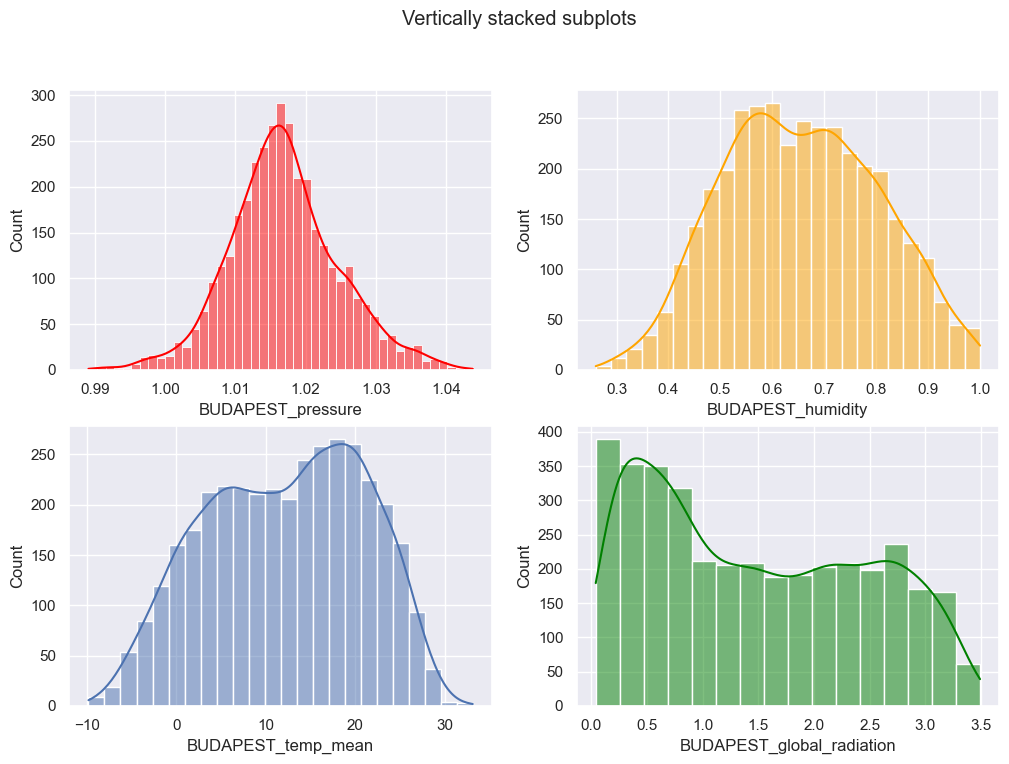

In [36]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(12,8))
fig.suptitle('Vertically stacked subplots')
sns.histplot(data = df_budapest, x ='BUDAPEST_pressure', ax=axs[0,0], color='red', kde=True)
sns.histplot(data = df_budapest, x ='BUDAPEST_humidity', ax=axs[0,1], color='orange', kde=True)
sns.histplot(data = df_budapest, x ='BUDAPEST_temp_mean', ax=axs[1,0], kde=True)
sns.histplot(data = df_budapest, x ='BUDAPEST_global_radiation', ax=axs[1,1], color='green', kde=True)

[Text(0.5, 1.0, 'Labels for BUDAPEST')]

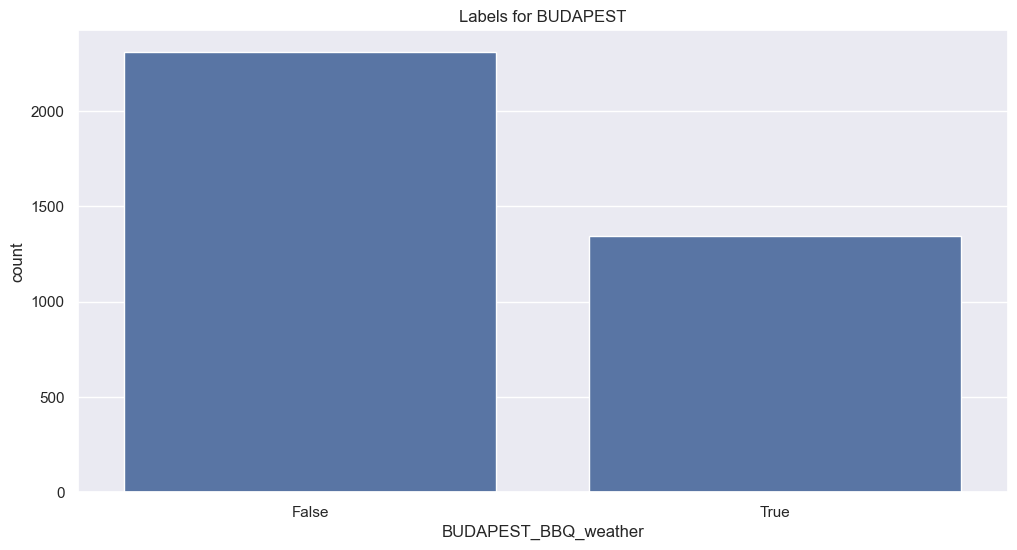

In [38]:
labels_budapest = label['BUDAPEST_BBQ_weather']
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
sns.countplot(x = labels_budapest).set(title='Labels for BUDAPEST')

In [39]:
true_val = len(labels_budapest[labels_budapest == True])
false_val = len(labels_budapest[labels_budapest == False])
print('Precent of True values: {0:.2f}%'.format(true_val/(true_val+false_val)*100))
print('Precent of False values: {0:.2f}%'.format(false_val/(true_val+false_val)*100))

Precent of True values: 36.75%
Precent of False values: 63.25%


[Text(0.5, 1.0, 'Relation between the temperature and the bbq weather')]

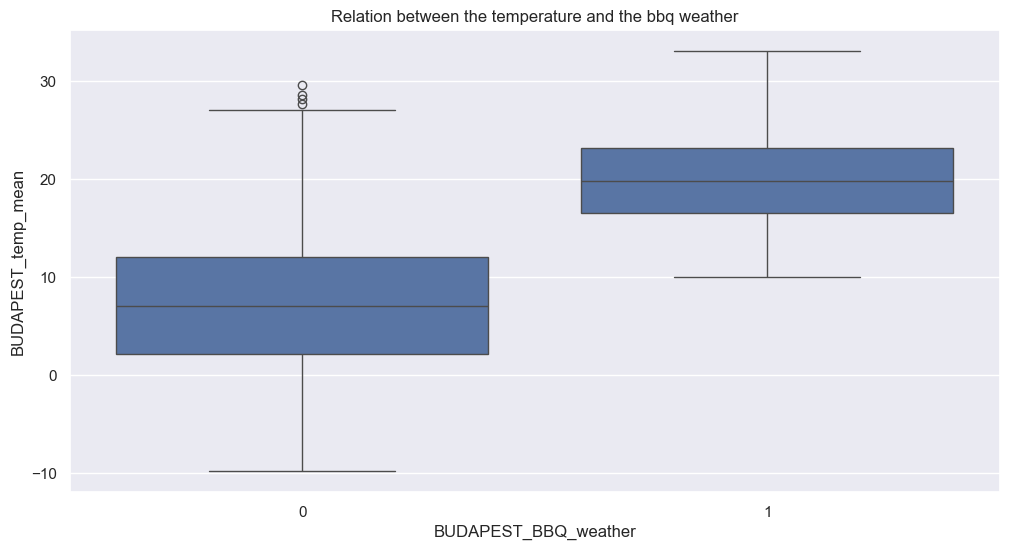

In [40]:
labels_budapest = labels_budapest.astype(int)
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
sns.boxplot(y = df_budapest['BUDAPEST_temp_mean'], x = labels_budapest).set(title='Relation between the temperature and the bbq weather')

dataset of Budapest is imbalanced

In [41]:
labels_budapest = labels_budapest.astype(int)
df_budapest = df_budapest.drop(['DATE'],axis=1)
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
ovrspl_X, ovrspl_y  = oversample.fit_resample(df_budapest, labels_budapest)

[Text(0.5, 1.0, 'Oversampled Labels for BUDAPEST')]

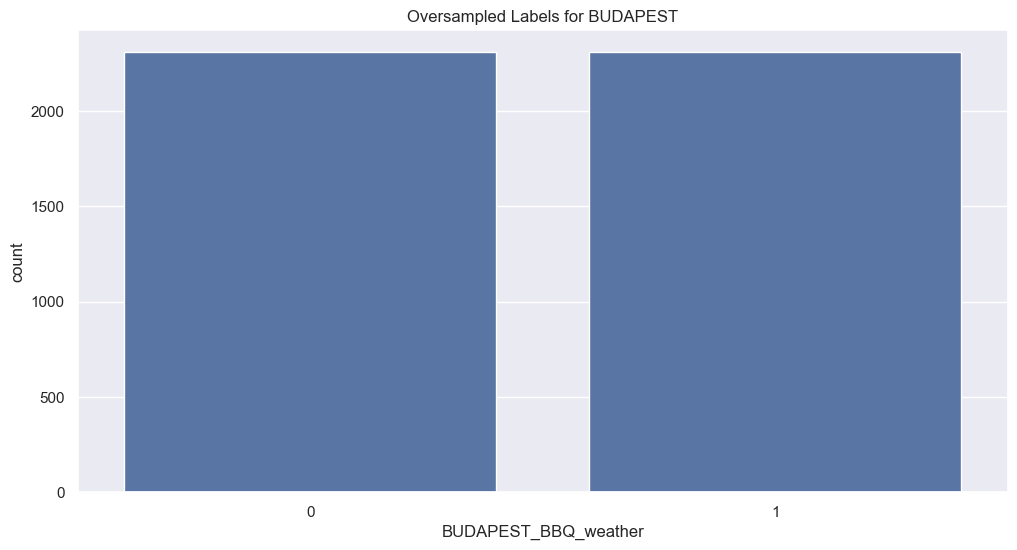

In [43]:
labels_budapest = label['BUDAPEST_BBQ_weather']
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
sns.countplot(x = ovrspl_y).set(title='Oversampled Labels for BUDAPEST')

In [44]:
true_val = len(ovrspl_y[ovrspl_y == 1])
false_val = len(ovrspl_y[ovrspl_y == 0])
print('Precent of True values: {0:.1f}%'.format(true_val/(true_val+false_val)*100))
print('Precent of False values: {0:.1f}%'.format(false_val/(true_val+false_val)*100))

Precent of True values: 50.0%
Precent of False values: 50.0%


[Text(0.5, 1.0, 'Correlation between features')]

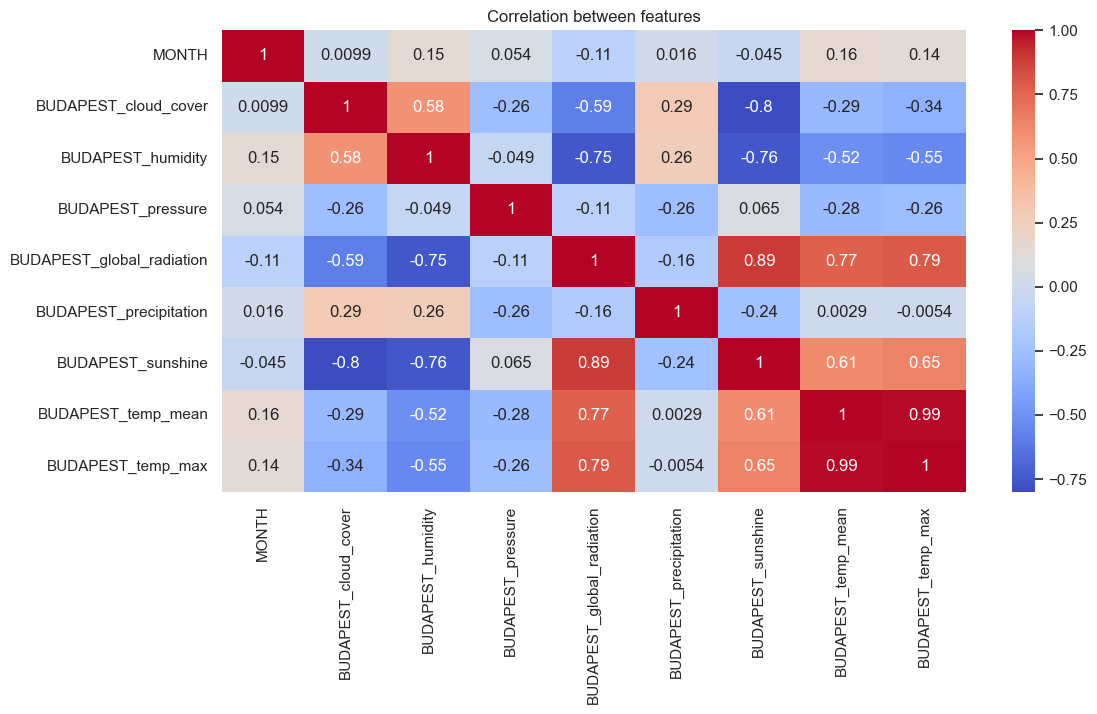

In [45]:
plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
sns.heatmap(df_budapest.corr(),annot=True,cmap='coolwarm').set(title='Correlation between features')

it's a high correlation between global radiation and sunshine, mean and max temperature<br>
it's almost full correlation between mean and max temperature<br>
it's high inverse correlation between sunshine and humidity, sunshine and cloud cover, global radiation and humidity<br>

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
norm_X = scaler.fit_transform(ovrspl_X)
norm_X = pd.DataFrame(norm_X, columns=df_budapest.columns)
norm_X.describe()

,MONTH,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_max
count,4622.000000,4622.000000,4622.000000,4622.000000,4622.000000,4622.000000,4622.000000,4622.000000,4622.000000
mean,0.508910,0.575022,0.505400,0.505930,0.469708,0.015498,0.442242,0.550592,0.538008
std,0.290208,0.295401,0.200122,0.133104,0.289143,0.052845,0.304368,0.201017,0.210443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272727,0.375000,0.351351,0.424132,0.197101,0.000000,0.140940,0.391608,0.368844
50%,0.545455,0.625000,0.486486,0.499086,0.475362,0.000000,0.476510,0.587413,0.576017
75%,0.727273,0.875000,0.648649,0.579525,0.733333,0.000000,0.704698,0.706294,0.704497
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
from sklearn.model_selection import train_test_split
# Splitting dataset on training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(ovrspl_X,ovrspl_y, test_size = 0.3, random_state = 42)
print('Training set: ' + str(len(X_train)))
print('Testing set: ' + str(len(X_test)))


Training set: 3235
Testing set: 1387


SVC Model

using the Support Vector Machine to weather predictions<br>
the kernel is linear

In [48]:
from sklearn.svm import SVC

model = SVC(verbose=True, kernel = 'linear', random_state = 0)
model.fit(X_train,y_train)

[LibSVM]............................................*...*................*...........................................*
optimization finished, #iter = 104631
obj = -583.279464, rho = -4.021189
nSV = 652, nBSV = 642
Total nSV = 652


SVC(kernel='linear', random_state=0, verbose=True)

Classification report--------------------------------
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       712
           1       0.91      0.98      0.94       675

    accuracy                           0.94      1387
   macro avg       0.95      0.95      0.94      1387
weighted avg       0.95      0.94      0.94      1387



[Text(0.5, 1.0, 'Confusion Matrix')]

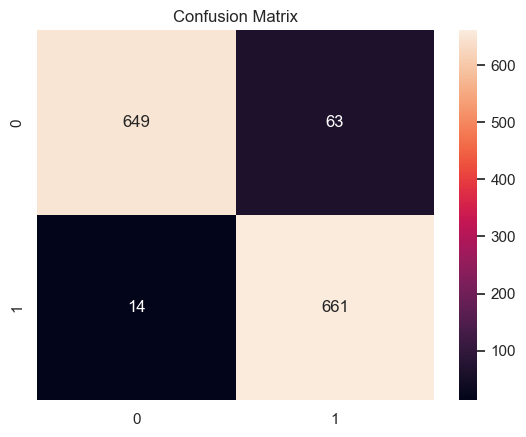

In [49]:
y_predict = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Classification report--------------------------------')
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict), annot=True, fmt='g').set(title='Confusion Matrix')

In [50]:
print('Model accuracy is: {0:.2f}%'.format(accuracy_score(y_test, y_predict)*100))

Model accuracy is: 94.45%
